In [3]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from zone_model import *

In [2]:
mlb_df = pd.read_csv('./mlb_data_2024.csv')
mlb_df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,SL,2024-06-17,85.4,-2.82,5.56,"Jiménez, Joe",672761,641729,strikeout,swinging_strike,...,2,1,2,Infield shade,Standard,152.0,0.035,-0.082,60.933576,7.94335
1,SL,2024-06-17,87.4,-2.71,5.57,"Jiménez, Joe",672761,641729,NaN,ball,...,2,1,2,Infield shade,Standard,187.0,0.000,0.016,NaN,NaN
2,FF,2024-06-17,95.7,-2.54,5.87,"Jiménez, Joe",672761,641729,NaN,ball,...,2,1,2,Infield shade,Standard,212.0,0.000,0.007,NaN,NaN
3,FF,2024-06-17,95.3,-2.39,5.75,"Jiménez, Joe",672761,641729,NaN,foul,...,2,1,2,Infield shade,Standard,220.0,0.000,0.000,NaN,NaN
4,FF,2024-06-17,95.2,-2.42,5.81,"Jiménez, Joe",672761,641729,NaN,swinging_strike,...,2,1,2,Standard,Standard,221.0,0.000,-0.021,76.942199,6.72893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299416,FF,2024-04-01,97.5,1.77,5.84,"Gore, MacKenzie",656582,669022,NaN,ball,...,0,0,0,Standard,Standard,153.0,0.000,0.096,NaN,NaN
299417,FF,2024-04-01,98.6,2.02,5.88,"Gore, MacKenzie",656582,669022,NaN,ball,...,0,0,0,Standard,Standard,147.0,0.000,0.036,NaN,NaN
299418,FF,2024-04-01,97.7,2.05,5.83,"Gore, MacKenzie",656582,669022,NaN,foul,...,0,0,0,Standard,Standard,150.0,0.000,-0.049,NaN,NaN
299419,FF,2024-04-01,96.8,2.10,5.84,"Gore, MacKenzie",656582,669022,NaN,ball,...,0,0,0,Standard,Standard,149.0,0.000,0.023,NaN,NaN


In [5]:
zone_model = ZoneModel('MLB')
call2label = {'ball':0, 'called_strike':1}
filtered_data = mlb_df[(mlb_df['description']=='called_strike')|(mlb_df['description']=='ball')]
filtered_data.dropna(subset=['plate_x', 'plate_z'], inplace=True)
calls_ = filtered_data['description'].to_numpy()
calls = []
for c in calls_:
    calls.append(call2label[c])
calls = np.array(calls)
x_data = filtered_data['plate_x'].to_numpy().astype(np.float32)
y_data = filtered_data['plate_z'].to_numpy().astype(np.float32)
print(x_data.shape, y_data.shape, calls.shape)

(149343,) (149343,) (149343,)


C:\Users\이기창\AppData\Local\Temp\ipykernel_23828\3375704575.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['plate_x', 'plate_z'], inplace=True)


In [6]:
zone_model.fit(x_data, y_data, calls)
zone_model.print_best_params()


Optimized Parameter of MLB:
alpha  = 0.9137874127668999
beta   = 13.657577520382095
lambda = 1.0768033307757126
r      = 3.835588865175
x0     = 0.018120957555175093
y0     = 2.4780204760041027


In [8]:
mlb_param = zone_model.best_params
param_dict = {'mlb_2024':{'alpha':mlb_param[0], 'beta':mlb_param[1], 'lambda':mlb_param[2], 'r':mlb_param[3], 'x0':mlb_param[4], 'y0':mlb_param[5]}}
param_dict['kbo_2024']={
'alpha'  : 0.8897596779140079,
'beta'   : 34.776924501142545,
'lambda' : 1.0721927456315026,
'r'      : 24.439691144647576,
'x0'     : 0.0009083436194117631,
'y0'     : 2.526984759498632,}

param_dict['kbo_2023']={
'alpha'  : 0.89820575628267339,
'beta'   : 12.5812195084012385,
'lambda' : 1.07441688424650056,
'r'      : 3.3023657116310776,
'x0'     : 0.005926288826652439,
'y0'     : 2.5107515843250665,}

pd.DataFrame.from_dict(param_dict).to_csv('./result/mlb_kbo.csv')

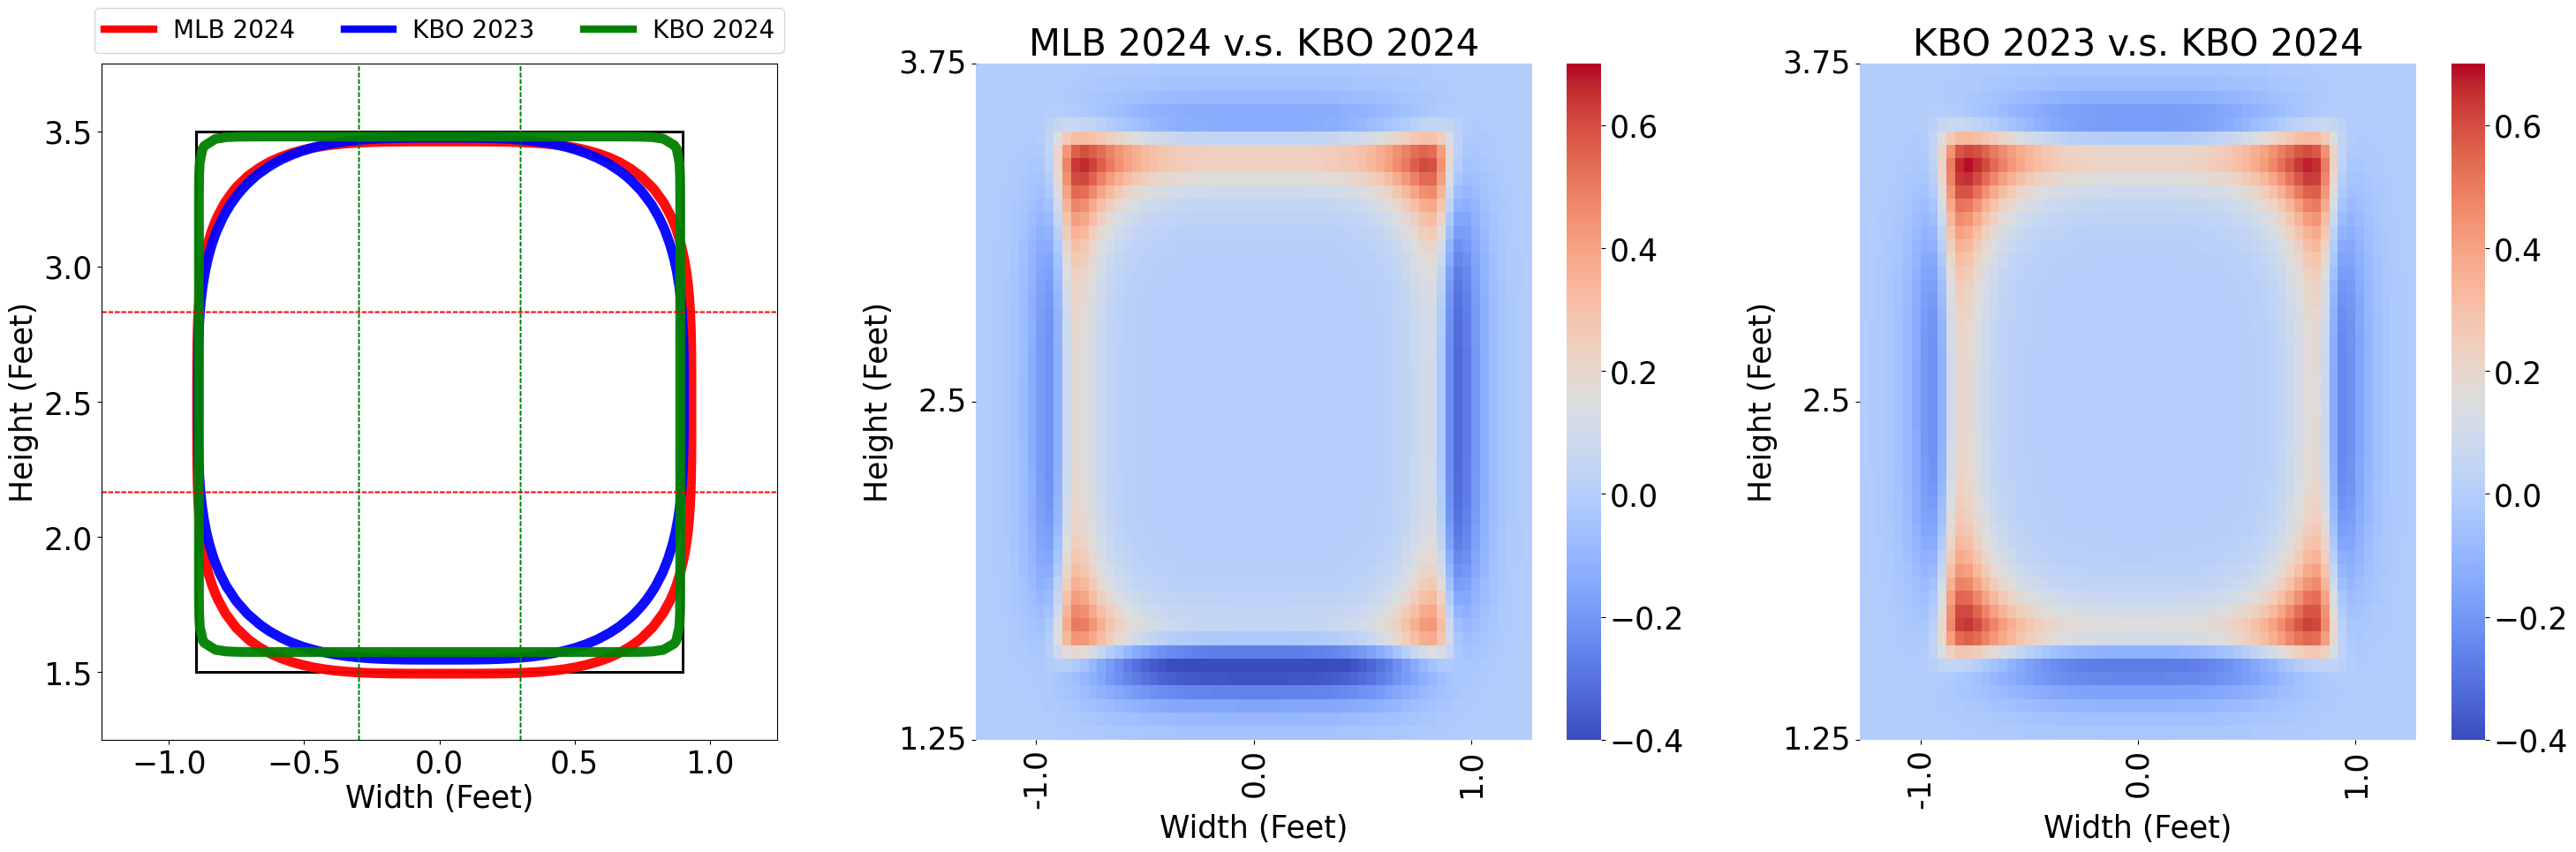

In [67]:
plt.rcParams.update({'font.size': 25})
cmap = plt.get_cmap("rainbow")
levels = [0.5]
titles = ['MLB 2024', 'KBO 2023', 'KBO 2024']
params = [mlb_param,
          [param_dict['kbo_2023']['alpha'], param_dict['kbo_2023']['beta'], param_dict['kbo_2023']['lambda'], param_dict['kbo_2023']['r'], param_dict['kbo_2023']['x0'], param_dict['kbo_2023']['y0']],
          [param_dict['kbo_2024']['alpha'], param_dict['kbo_2024']['beta'], param_dict['kbo_2024']['lambda'], param_dict['kbo_2024']['r'], param_dict['kbo_2024']['x0'], param_dict['kbo_2024']['y0']]
          ]
prob_trace = []
fig, axs = plt.subplots(1,3,figsize=((30, 10)))
ax = axs[0]
for idx, param in enumerate(params):
    grid_size = 100
    x_contour = np.linspace(-2, 2, grid_size)
    y_contour = np.linspace( 0, 5, grid_size)
    X, Y = np.meshgrid(x_contour, y_contour)

    color = ['red', 'blue', 'green']# cmap(np.linspace(0,1.,len(titles)))
    zone_model.params      = param
    zone_model.best_params = param
    probs = zone_model.infer(X.reshape(-1), Y.reshape(-1))
    probs = probs.reshape((grid_size,grid_size))
    prob_trace.append(probs)
    CS = ax.contour(X, Y, probs, levels=levels, colors=[color[idx]], linewidths=8.0, alpha=0.95)
    ax.set_aspect('equal')
    ax.set_xlim(-1.25, 1.25)
    ax.set_ylim(1.25, 3.75)

    r_corner = (-0.9, 1.5)
    r_width  = 1.8
    r_height = 2.
    rectangle = plt.Rectangle(r_corner, r_width, r_height, alpha=1., linewidth=2, edgecolor='black', facecolor='none')
    ax.add_patch(rectangle)
    for i in range(2):
        ax.axhline(y=(i+1)*(r_height/3)+r_corner[1], color='r', linestyle='--', linewidth=1.)  
        ax.axvline(x=(i+1)*(r_width/3)+r_corner[0] , color='g', linestyle='--', linewidth=1.)  
    ax.set_xlabel('Width (Feet)')
    ax.set_ylabel('Height (Feet)')
    ax.plot([],[], label=titles[idx], color=color[idx], linewidth=6.0)
ax.legend(loc='upper center', fontsize=20, ncols=3, bbox_to_anchor=(0.5, 1.1))

ax = axs[1]
sns.heatmap(prob_trace[2]-prob_trace[0], cmap='coolwarm', vmin=-.4, vmax=.7, ax=ax)
ax.set_xticks(np.linspace(0, grid_size, 5), np.linspace(-2, 2, 5))
ax.set_yticks(np.linspace(0, grid_size, 5), np.linspace(0, 5, 5))
ax.set_xlim([18, 100-18])
ax.set_ylim([25, 100-25])
ax.set_xlabel('Width (Feet)')
ax.set_ylabel('Height (Feet)')
ax.set_title('MLB 2024 v.s. KBO 2024')

ax = axs[2]
sns.heatmap(prob_trace[2]-prob_trace[1], cmap='coolwarm', vmin=-.4, vmax=.7, ax=ax)
ax.set_xticks(np.linspace(0, grid_size, 5), np.linspace(-2, 2, 5))
ax.set_yticks(np.linspace(0, grid_size, 5), np.linspace(0, 5, 5))
ax.set_xlim([18, 100-18])
ax.set_ylim([25, 100-25])
ax.set_xlabel('Width (Feet)')
ax.set_ylabel('Height (Feet)')
ax.set_title('KBO 2023 v.s. KBO 2024')
plt.tight_layout()
plt.savefig('./figure/kbo-vs-mlb.pdf', format='pdf')
plt.show()

In [77]:
mlb_df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,SL,2024-06-17,85.4,-2.82,5.56,"Jiménez, Joe",672761,641729,strikeout,swinging_strike,...,2,1,2,Infield shade,Standard,152.0,0.035,-0.082,60.933576,7.94335
1,SL,2024-06-17,87.4,-2.71,5.57,"Jiménez, Joe",672761,641729,NaN,ball,...,2,1,2,Infield shade,Standard,187.0,0.000,0.016,NaN,NaN
2,FF,2024-06-17,95.7,-2.54,5.87,"Jiménez, Joe",672761,641729,NaN,ball,...,2,1,2,Infield shade,Standard,212.0,0.000,0.007,NaN,NaN
3,FF,2024-06-17,95.3,-2.39,5.75,"Jiménez, Joe",672761,641729,NaN,foul,...,2,1,2,Infield shade,Standard,220.0,0.000,0.000,NaN,NaN
4,FF,2024-06-17,95.2,-2.42,5.81,"Jiménez, Joe",672761,641729,NaN,swinging_strike,...,2,1,2,Standard,Standard,221.0,0.000,-0.021,76.942199,6.72893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299416,FF,2024-04-01,97.5,1.77,5.84,"Gore, MacKenzie",656582,669022,NaN,ball,...,0,0,0,Standard,Standard,153.0,0.000,0.096,NaN,NaN
299417,FF,2024-04-01,98.6,2.02,5.88,"Gore, MacKenzie",656582,669022,NaN,ball,...,0,0,0,Standard,Standard,147.0,0.000,0.036,NaN,NaN
299418,FF,2024-04-01,97.7,2.05,5.83,"Gore, MacKenzie",656582,669022,NaN,foul,...,0,0,0,Standard,Standard,150.0,0.000,-0.049,NaN,NaN
299419,FF,2024-04-01,96.8,2.10,5.84,"Gore, MacKenzie",656582,669022,NaN,ball,...,0,0,0,Standard,Standard,149.0,0.000,0.023,NaN,NaN


In [82]:
dates = mlb_df['game_date'].to_numpy()
home_team = mlb_df['home_team'].to_numpy()
inning = mlb_df['inning'].to_numpy()
concat_arr = []
for idx, date in enumerate(dates):
    concat_arr.append(date+'_'+home_team[idx])
    
concat_arr = []
for idx, date in enumerate(dates):
    concat_arr.append(date+'_'+home_team[idx]+'_'+str(inning[idx]))

In [83]:
len(set(concat_arr))

9273